In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
import numpy as np
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.stats import boxcox
# import catboost
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

In [22]:
# reading the file

properties = pd.read_csv('rentals.csv')
properties.head()

,id,latitude,longitude,property_type,room_type,bathrooms,bedrooms,minimum_nights,price
0,958,37.76931,-122.43386,Apartment,Entire home/apt,1.0,1.0,1,$170.00
1,3850,37.75402,-122.45805,House,Private room,1.0,1.0,1,$99.00
2,5858,37.74511,-122.42102,Apartment,Entire home/apt,1.0,2.0,30,$235.00
3,7918,37.76669,-122.45250,Apartment,Private room,4.0,1.0,32,$65.00
4,8142,37.76487,-122.45183,Apartment,Private room,4.0,1.0,32,$65.00


In [23]:
# Dropping irrrelevant columns

properties = properties.drop('id', axis='columns')

# dropping null values

properties = properties.dropna()

# Examining the new dataset
properties.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8095 entries, 0 to 8110
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   latitude        8095 non-null   float64
 1   longitude       8095 non-null   float64
 2   property_type   8095 non-null   object 
 3   room_type       8095 non-null   object 
 4   bathrooms       8095 non-null   float64
 5   bedrooms        8095 non-null   float64
 6   minimum_nights  8095 non-null   int64  
 7   price           8095 non-null   object 
dtypes: float64(4), int64(1), object(3)
memory usage: 569.2+ KB


In [24]:
# Looking for categorical columns in the object dtype
properties.nunique()

latitude          5053
longitude         5173
property_type       26
room_type            4
bathrooms           17
bedrooms            10
minimum_nights      53
price              526
dtype: int64

In [25]:
# Converting object dtype to categorical values
properties['property_type'] = properties.property_type.astype('category')
properties['room_type'] = properties.room_type.astype('category')

properties.head()


,latitude,longitude,property_type,room_type,bathrooms,bedrooms,minimum_nights,price
0,37.76931,-122.43386,Apartment,Entire home/apt,1.0,1.0,1,$170.00
1,37.75402,-122.45805,House,Private room,1.0,1.0,1,$99.00
2,37.74511,-122.42102,Apartment,Entire home/apt,1.0,2.0,30,$235.00
3,37.76669,-122.45250,Apartment,Private room,4.0,1.0,32,$65.00
4,37.76487,-122.45183,Apartment,Private room,4.0,1.0,32,$65.00


In [26]:
# Cleaning the price column

properties['price'] = properties.price.str.replace('$', '', regex=True).str.replace(',', '',regex=True)
properties['price'] = pd.to_numeric(properties.price)
properties.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8095 entries, 0 to 8110
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   latitude        8095 non-null   float64 
 1   longitude       8095 non-null   float64 
 2   property_type   8095 non-null   category
 3   room_type       8095 non-null   category
 4   bathrooms       8095 non-null   float64 
 5   bedrooms        8095 non-null   float64 
 6   minimum_nights  8095 non-null   int64   
 7   price           8095 non-null   float64 
dtypes: category(2), float64(5), int64(1)
memory usage: 460.0 KB


In [27]:
# Encoding categorical values
properties2 = pd.get_dummies(properties, columns = ['property_type', 'room_type'])

In [28]:
# chooseing features and target variables

x = properties2.drop('price', axis=1)
y = properties2['price']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)


In [29]:
# lr = LinearRegression()
# lr.fit(x_train, y_train)
# print('R2 Squared score: ',lr.score(x_test,y_test))
# y_pred = lr.predict(x_test)
# print('Mean Squared Error: ', MSE(y_test,y_pred))
# print(lr.intercept_)

def linear_model(a,b,c,d):
    lr = LinearRegression()
    lr.fit(a,b)
    y_pred = lr.predict(c)
    Mean_error = MSE(d, y_pred)
    score = lr.score(c,d)
    RMSE = Mean_error * (1/2)
    coef = lr.coef_
    intercept = lr.intercept_
    g = f'MSE: {Mean_error}'
    h = f'R2 score: {score}'
    e = f'Coefficients: {coef}'
    f = f'Intercept: {intercept}'
    return e, f, g, h

linear_model(x_train,y_train,x_test,y_test)
    

('Coefficients: [ 1.33296328e+03  1.68880946e+02  4.84580096e+00  1.12685853e+02\n -3.48002957e-07 -7.09397426e+01 -6.60721889e+01 -1.20354464e+01\n  2.64084074e+02 -6.69990418e+01 -1.35098828e+02 -1.29723394e+02\n -4.15271906e+01 -3.35733005e+01 -7.34270904e+00 -1.91051957e+02\n  2.18611758e+02 -6.34157108e+01 -4.33046472e+01 -4.64177028e+01\n  1.28942531e+02 -4.71738725e+01 -8.86783945e+01  3.78503141e+01\n -9.66122821e-01 -3.35727464e+00  3.25645188e+02  7.58224636e+00\n -1.02783982e+02  2.97141511e+00  1.64773978e+02  9.86897828e+01\n -8.35749300e+01  3.21307007e+01 -4.72455535e+01]',
 'Intercept: -29625.8006096972',
 'MSE: 201179.0584503936',
 'R2 score: 0.09825696605152201')

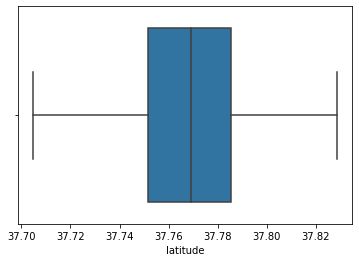

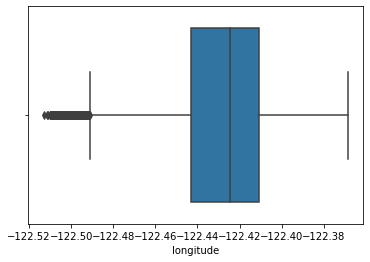

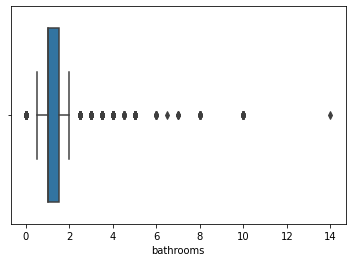

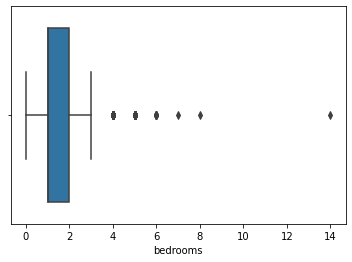

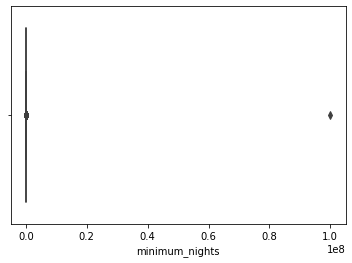

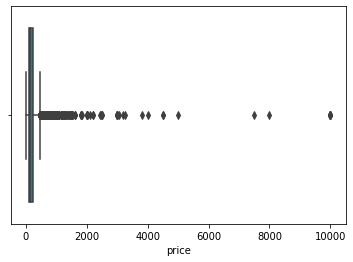

In [30]:
for i in properties.columns:
    if properties[f'{i}'].dtype != 'category':
            sns.boxplot(x=i, data=properties)
            plt.show()

In [31]:
night = properties[properties['minimum_nights'] >150].index

In [32]:
pric = properties[properties['price'] >500].index

In [33]:
bed = properties[properties['bedrooms'] >3].index

In [34]:
bath = properties[properties['bathrooms'] >3].index

In [35]:
# prop = properties[properties['bathrooms'] > properties['bedrooms']].index

In [36]:
prin = set(night).union(set(pric), set(bed), set(bath))
print(len(prin))

841


In [37]:
properties_filter = properties.drop(prin, axis=0)
properties_filter

,latitude,longitude,property_type,room_type,bathrooms,bedrooms,minimum_nights,price
0,37.76931,-122.43386,Apartment,Entire home/apt,1.0,1.0,1,170.0
1,37.75402,-122.45805,House,Private room,1.0,1.0,1,99.0
2,37.74511,-122.42102,Apartment,Entire home/apt,1.0,2.0,30,235.0
6,37.75919,-122.42237,Condominium,Private room,1.0,1.0,1,139.0
7,37.76259,-122.40543,House,Private room,1.0,1.0,1,135.0
...,...,...,...,...,...,...,...,...
8105,37.70463,-122.46288,House,Private room,0.0,1.0,1,100.0
8107,37.77799,-122.42159,Condominium,Entire home/apt,1.0,1.0,1,200.0
8108,37.73410,-122.38917,Hut,Private room,2.0,1.0,30,69.0
8109,37.78144,-122.41207,Apartment,Entire home/apt,1.0,1.0,30,187.0


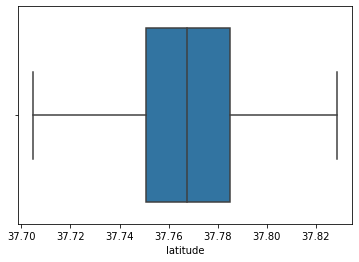

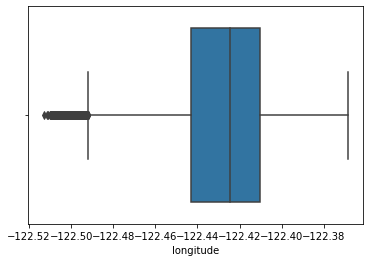

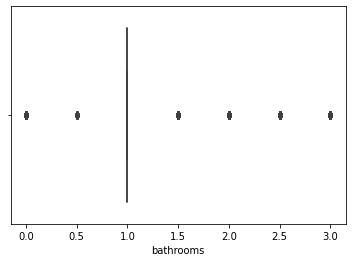

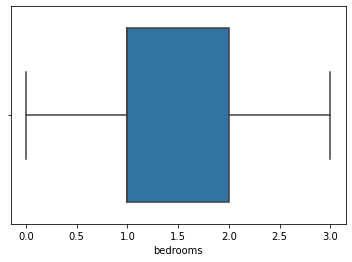

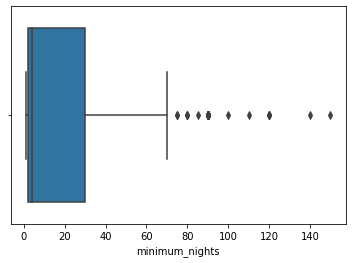

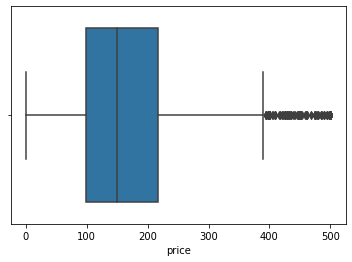

In [38]:
for ing in properties.columns:
    if properties[f'{ing}'].dtype != 'category':
            sns.boxplot(x=ing, data=properties_filter)
            plt.show()

In [39]:
properties_filter.corr()

,latitude,longitude,bathrooms,bedrooms,minimum_nights,price
latitude,1.000000,0.180403,-0.012643,-0.139484,0.192738,0.156208
longitude,0.180403,1.000000,-0.034331,-0.115094,0.110133,0.063090
bathrooms,-0.012643,-0.034331,1.000000,0.450348,0.063238,0.261548
bedrooms,-0.139484,-0.115094,0.450348,1.000000,0.003202,0.504971
minimum_nights,0.192738,0.110133,0.063238,0.003202,1.000000,-0.138374
price,0.156208,0.063090,0.261548,0.504971,-0.138374,1.000000


In [40]:
properties.corr()

,latitude,longitude,bathrooms,bedrooms,minimum_nights,price
latitude,1.000000,0.187000,0.078469,-0.108647,-0.007415,0.083231
longitude,0.187000,1.000000,0.007627,-0.115893,0.002028,0.015867
bathrooms,0.078469,0.007627,1.000000,0.327916,-0.004766,0.081981
bedrooms,-0.108647,-0.115893,0.327916,1.000000,-0.004159,0.262343
minimum_nights,-0.007415,0.002028,-0.004766,-0.004159,1.000000,-0.004247
price,0.083231,0.015867,0.081981,0.262343,-0.004247,1.000000


In [41]:
properties_filter.skew()

C:\Users\Austin\AppData\Local\Temp\ipykernel_7752\546600108.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  properties_filter.skew()


latitude         -0.422105
longitude        -0.957425
bathrooms         1.790378
bedrooms          0.708931
minimum_nights    1.047505
price             1.167452
dtype: float64

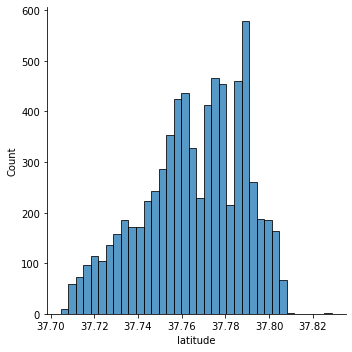

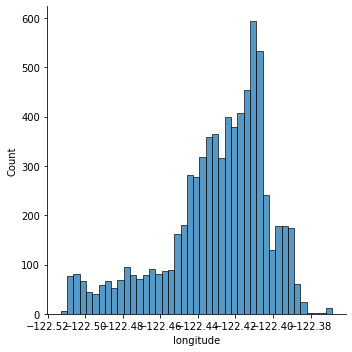

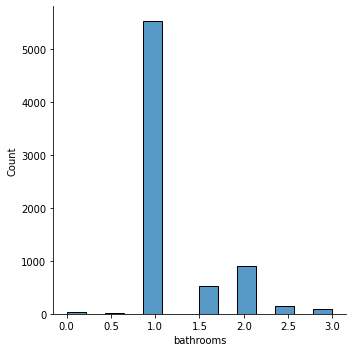

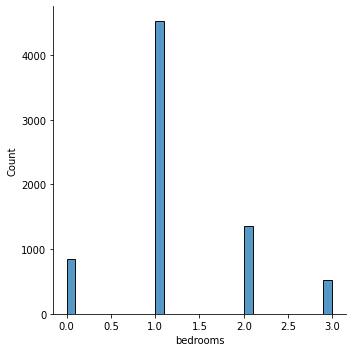

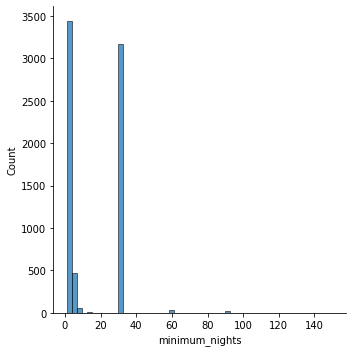

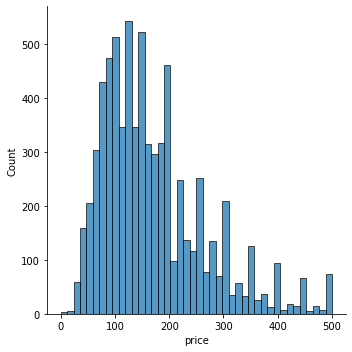

In [42]:
for dis in properties.columns:
    if properties[f'{dis}'].dtype != 'category':
        # if dis != 'minimum_nights':
            sns.displot(properties_filter[f'{dis}'])
            plt.show()

In [43]:
properties_filter[(properties_filter.bedrooms == 0) & (properties_filter.bathrooms==0)].head(60)

,latitude,longitude,property_type,room_type,bathrooms,bedrooms,minimum_nights,price


In [44]:
len(properties_filter[properties_filter.bathrooms == 0])

38

In [45]:
# 7022
properties_filter = properties_filter.drop(7022, axis=0)

In [46]:
log_target = np.log1p(properties_filter["price"])
log_target.skew()

-0.3031618290437542

In [47]:
# Removing nil prices value
properties_filter = properties_filter.drop(properties_filter[properties_filter.price <=0].index, axis=0)


-0.4236748575562939


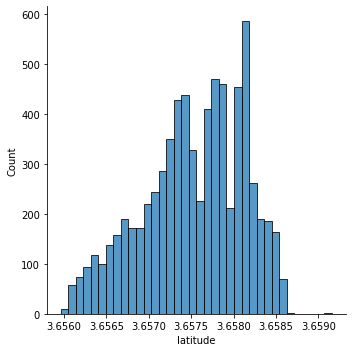

0.08126578358804372


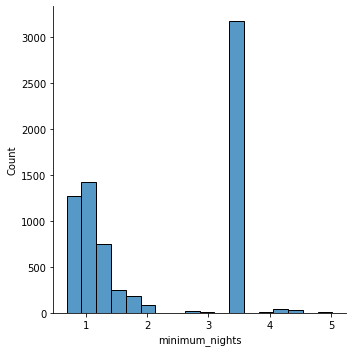

-0.21535285334114584


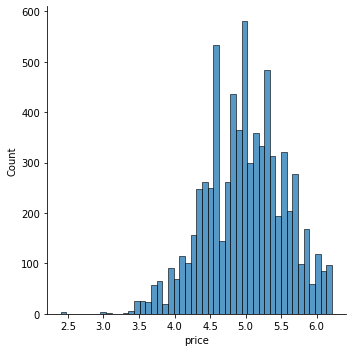

In [48]:
for trans in properties.columns:
    if properties[f'{trans}'].dtype != 'category':
        if trans == 'price' or trans == 'minimum_nights' or trans == 'latitude':
            properties_filter[f'{trans}'] = np.log1p(properties_filter[f'{trans}'])
            print(properties_filter[f'{trans}'].skew())
            sns.displot(properties_filter[f'{trans}'])
            plt.show()

0.47905698181999706


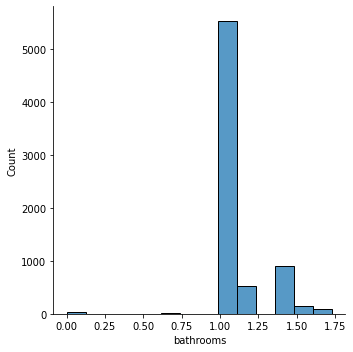

-1.0208269425538075


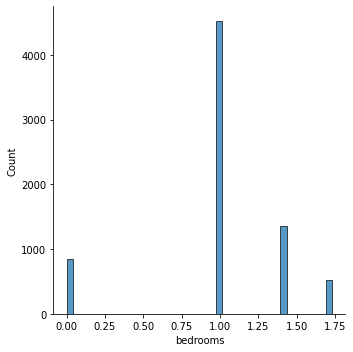

In [49]:
for trans2 in properties.columns:
    if properties[f'{trans2}'].dtype != 'category':
        if trans2 == 'bedrooms' or trans2 == 'bathrooms':
            properties_filter[f'{trans2}'] = properties_filter[f'{trans2}']**(1/2)
            print(properties_filter[f'{trans2}'].skew())
            sns.displot(properties_filter[f'{trans2}'])
            plt.show()

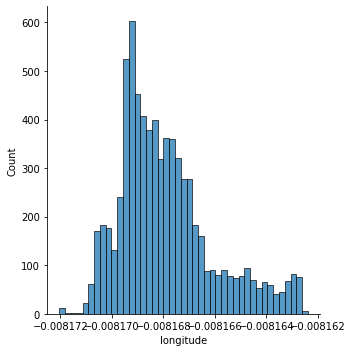

In [50]:
properties_filter['longitude'] = 1/properties_filter['longitude']
sns.displot(properties_filter['longitude'])

In [51]:
properties_filter.skew()

C:\Users\Austin\AppData\Local\Temp\ipykernel_7752\546600108.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  properties_filter.skew()


latitude         -0.423675
longitude         0.956062
bathrooms         0.479057
bedrooms         -1.020827
minimum_nights    0.081266
price            -0.215353
dtype: float64

In [52]:
properties_filter.corr()

,latitude,longitude,bathrooms,bedrooms,minimum_nights,price
latitude,1.000000,-0.180470,-0.023074,-0.163406,0.200922,0.175555
longitude,-0.180470,1.000000,0.038778,0.128682,-0.120622,-0.078157
bathrooms,-0.023074,0.038778,1.000000,0.350655,0.073411,0.182198
bedrooms,-0.163406,0.128682,0.350655,1.000000,-0.007861,0.338091
minimum_nights,0.200922,-0.120622,0.073411,-0.007861,1.000000,-0.120626
price,0.175555,-0.078157,0.182198,0.338091,-0.120626,1.000000


In [53]:
properties_filter.tail(20)

,latitude,longitude,property_type,room_type,bathrooms,bedrooms,minimum_nights,price
8086,3.657385,-0.008171,Apartment,Entire home/apt,1.000000,1.000000,3.433987,5.583496
8087,3.657784,-0.008168,Apartment,Entire home/apt,1.414214,1.414214,3.433987,6.077642
8088,3.657728,-0.008170,Apartment,Entire home/apt,1.000000,1.000000,3.433987,5.609472
8089,3.657800,-0.008168,Apartment,Entire home/apt,1.414214,1.414214,3.433987,6.008813
8090,3.658086,-0.008169,Apartment,Entire home/apt,1.000000,1.000000,3.433987,5.564520
8091,3.658098,-0.008170,Apartment,Entire home/apt,1.000000,1.000000,3.433987,5.808142
8092,3.658133,-0.008170,Apartment,Entire home/apt,1.000000,1.000000,3.433987,5.828946
8095,3.656282,-0.008166,House,Private room,1.000000,1.000000,3.433987,4.262680
8097,3.656282,-0.008166,House,Private room,1.000000,1.000000,3.433987,4.248495
8099,3.658131,-0.008170,Condominium,Entire home/apt,1.224745,1.000000,0.693147,5.703782


In [54]:
count_prop = properties_filter['property_type'].value_counts()

In [55]:
count_prop[count_prop < 25]

Other                23
Bungalow             16
Bed and breakfast    15
Cottage              12
Resort               10
Villa                 9
Castle                4
Cabin                 3
Tiny house            3
Earth house           1
Dome house            1
Camper/RV             1
Hut                   1
In-law                1
Name: property_type, dtype: int64

In [56]:
properties_filter[properties_filter['property_type'] == 'Villa']

,latitude,longitude,property_type,room_type,bathrooms,bedrooms,minimum_nights,price
2662,3.656267,-0.008171,Villa,Private room,1.000000,1.0,0.693147,4.605170
5524,3.658544,-0.008167,Villa,Private room,1.000000,1.0,0.693147,5.303305
5525,3.658548,-0.008167,Villa,Private room,1.000000,1.0,0.693147,5.638355
5526,3.658532,-0.008167,Villa,Private room,1.000000,1.0,0.693147,5.525453
5527,3.658563,-0.008167,Villa,Private room,1.000000,1.0,0.693147,5.707110
6041,3.658432,-0.008169,Villa,Shared room,1.414214,1.0,3.433987,3.526361
6042,3.658440,-0.008169,Villa,Shared room,1.414214,1.0,3.465736,3.465736
6310,3.658558,-0.008169,Villa,Shared room,1.414214,1.0,3.465736,4.394449
6311,3.658553,-0.008169,Villa,Shared room,1.414214,1.0,3.433987,3.637586


In [57]:
prope = properties_filter['property_type']


mask = prope.isin(count_prop[count_prop < 25].index)


prope[mask] = 'Other'
# properties_filter['property_type'] = prope.mask


In [58]:
prope2 = prope.value_counts() 

In [59]:
prope2[prope2 < 25].index

CategoricalIndex(['Earth house', 'Dome house', 'Cottage', 'Castle', 'Hut',
                  'In-law', 'Camper/RV', 'Cabin', 'Resort', 'Bungalow',
                  'Tiny house', 'Bed and breakfast', 'Villa'],
                 categories=['Aparthotel', 'Apartment', 'Bed and breakfast', 'Boutique hotel', 'Bungalow', 'Cabin', 'Camper/RV', 'Castle', ...], ordered=False, dtype='category')

In [60]:
prope3 =prope.copy()
prope3

0         Apartment
1             House
2         Apartment
6       Condominium
7             House
           ...     
8105          House
8107    Condominium
8108          Other
8109      Apartment
8110          House
Name: property_type, Length: 7252, dtype: category
Categories (26, object): ['Aparthotel', 'Apartment', 'Bed and breakfast', 'Boutique hotel', ..., 'Serviced apartment', 'Tiny house', 'Townhouse', 'Villa']

In [61]:
# prope4 = pd.CategoricalIndex.remove_unused_categories(properties_filter)
# prope4

In [62]:
pd.DataFrame(prope).columns

Index(['property_type'], dtype='object')

In [63]:
prope.value_counts()

Apartment             3013
House                 1967
Condominium            794
Guest suite            570
Boutique hotel         246
Hotel                  137
Townhouse              122
Serviced apartment     110
Other                  100
Loft                    75
Hostel                  52
Guesthouse              39
Aparthotel              27
Earth house              0
Dome house               0
Cottage                  0
Castle                   0
Hut                      0
In-law                   0
Camper/RV                0
Cabin                    0
Resort                   0
Bungalow                 0
Tiny house               0
Bed and breakfast        0
Villa                    0
Name: property_type, dtype: int64

In [64]:
properties_filter['property_type'].unique()

['Apartment', 'House', 'Condominium', 'Townhouse', 'Loft', ..., 'Guesthouse', 'Serviced apartment', 'Hotel', 'Boutique hotel', 'Aparthotel']
Length: 13
Categories (26, object): ['Aparthotel', 'Apartment', 'Bed and breakfast', 'Boutique hotel', ..., 'Serviced apartment', 'Tiny house', 'Townhouse', 'Villa']

In [65]:
properties_filter[mask]

,latitude,longitude,property_type,room_type,bathrooms,bedrooms,minimum_nights,price
73,3.656927,-0.008169,Other,Private room,1.000000,1.000000,3.433987,5.017280
230,3.657465,-0.008167,Other,Private room,1.000000,1.000000,1.386294,4.605170
424,3.657294,-0.008169,Other,Private room,1.000000,1.000000,1.098612,4.394449
440,3.656355,-0.008167,Other,Entire home/apt,1.000000,1.414214,1.609438,5.198497
447,3.656551,-0.008167,Other,Private room,1.000000,1.000000,3.433987,3.713572
...,...,...,...,...,...,...,...,...
7801,3.656586,-0.008166,Other,Entire home/apt,1.224745,1.000000,3.465736,4.330733
7810,3.657712,-0.008168,Other,Private room,1.000000,1.000000,1.609438,4.418841
7895,3.658408,-0.008168,Other,Entire home/apt,1.000000,1.414214,3.433987,5.198497
8007,3.657536,-0.008167,Other,Entire home/apt,1.224745,1.414214,1.098612,5.438079


In [66]:
# Encoding categorical values
properties_filter = pd.get_dummies(properties_filter, columns = ['property_type', 'room_type'], drop_first=True)

In [67]:
properties_filter

,latitude,longitude,bathrooms,bedrooms,minimum_nights,price,property_type_Apartment,property_type_Bed and breakfast,property_type_Boutique hotel,property_type_Bungalow,...,property_type_Loft,property_type_Other,property_type_Resort,property_type_Serviced apartment,property_type_Tiny house,property_type_Townhouse,property_type_Villa,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,3.657629,-0.008168,1.000000,1.000000,0.693147,5.141664,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.657234,-0.008166,1.000000,1.000000,0.693147,4.605170,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,3.657005,-0.008169,1.000000,1.414214,3.433987,5.463832,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,3.657368,-0.008168,1.000000,1.000000,0.693147,4.941642,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7,3.657456,-0.008170,1.000000,1.000000,0.693147,4.912655,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8105,3.655959,-0.008166,0.000000,1.000000,0.693147,4.615121,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8107,3.657853,-0.008168,1.000000,1.000000,0.693147,5.303305,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8108,3.656720,-0.008171,1.414214,1.000000,3.433987,4.248495,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
8109,3.657942,-0.008169,1.000000,1.000000,3.433987,5.236442,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
len(properties_filter.columns)

34

In [69]:
# choosing features and target variables

filter_x = properties_filter.drop('price', axis=1).values
filter_y = properties_filter['price'].values

filter_x_train, filter_x_test, filter_y_train, filter_y_test = train_test_split(filter_x, filter_y, test_size=0.2, random_state=42)
filter_x_train


array([[ 3.65682387, -0.00816503,  1.41421356, ...,  0.        ,
         0.        ,  0.        ],
       [ 3.65616616, -0.00816538,  1.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 3.65790052, -0.00816848,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 3.6578064 , -0.00816896,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 3.65814701, -0.00816953,  1.        , ...,  1.        ,
         0.        ,  0.        ],
       [ 3.6566731 , -0.00816672,  1.        , ...,  0.        ,
         1.        ,  0.        ]])

In [70]:
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler


transformer = pd.DataFrame(StandardScaler().fit_transform(properties_filter), columns=properties_filter.columns)

# choosing features and target variables

transformer_filter_x = transformer.drop('price', axis=1).values
transformer_filter_y = transformer['price'].values

transformer_filter_x_train, transformer_filter_x_test, transformer_filter_y_train, transformer_filter_y_test = train_test_split(transformer_filter_x, transformer_filter_y, test_size=0.2, random_state=42)


# transformer_y_train = RobustScaler().fit_transform(filter_y)
# transformer_x_test = RobustScaler().fit_transform(filter_x_test)
# transformer_y_test = RobustScaler().fit_transform(filter_y_test)
transformer_filter_x_train

array([[-1.18645531,  1.57554596,  1.71347489, ..., -0.1458239 ,
        -0.77061414, -0.16044493],
       [-2.29742072,  1.38203713, -0.43179744, ..., -0.1458239 ,
         1.2976663 , -0.16044493],
       [ 0.6321705 , -0.30761459, -0.43179744, ..., -0.1458239 ,
        -0.77061414, -0.16044493],
       ...,
       [ 0.47317878, -0.56596985, -0.43179744, ..., -0.1458239 ,
        -0.77061414, -0.16044493],
       [ 1.0485272 , -0.87741686, -0.43179744, ...,  6.85758631,
        -0.77061414, -0.16044493],
       [-1.4411233 ,  0.65395902, -0.43179744, ..., -0.1458239 ,
         1.2976663 , -0.16044493]])

In [71]:
linear_model(transformer_filter_x_train, transformer_filter_y_train, transformer_filter_x_test, transformer_filter_y_test)

('Coefficients: [ 1.96679032e-01 -7.95182288e-02  1.08031054e-01  2.95464176e-01\n -2.69908761e-01 -5.09451513e-02 -1.38777878e-17  1.11110114e-01\n -5.55111512e-17  2.77555756e-17  5.55111512e-17  1.38777878e-17\n  2.10894008e-02  1.38777878e-17  2.77555756e-17  2.77555756e-17\n -7.28719610e-02 -1.30164910e-02 -5.24803484e-02  7.59827305e-02\n -2.75856909e-02  0.00000000e+00  0.00000000e+00  2.71787332e-02\n  1.12171004e-02  0.00000000e+00 -1.81326019e-02  0.00000000e+00\n -1.19097348e-02  0.00000000e+00 -1.70549985e-01 -5.05858885e-01\n -4.07149039e-01]',
 'Intercept: -0.002592012293576627',
 'MSE: 0.47716152067422635',
 'R2 score: 0.5181042926421141')

In [72]:
linear_model(filter_x_train, filter_y_train, filter_x_test, filter_y_test)

('Coefficients: [ 1.86816416e+02 -2.43498325e+04  3.14627368e-01  3.84302911e-01\n -1.26286783e-01 -5.81325196e-02 -7.70062575e-08  3.45142576e-01\n -2.24315289e-10 -3.41045250e-08  1.80853781e-08 -7.57410356e-08\n  3.79797877e-02  7.17464685e-08  9.00429680e-08 -1.05884290e-08\n -1.52271055e-01 -1.00080904e-01 -3.49765004e-01  3.13844646e-01\n -3.48904648e-02  0.00000000e+00  0.00000000e+00  1.51068762e-01\n  5.40896809e-02  0.00000000e+00 -8.34260010e-02  0.00000000e+00\n -5.20744842e-02  0.00000000e+00 -6.71662375e-01 -5.88340271e-01\n -1.46371181e+00]',
 'Intercept: -877.3434772356513',
 'MSE: 0.15088461237337586',
 'R2 score: 0.5181042926421402')

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.kernel_ridge import KernelRidge

alp = np.arange(0,0.01,0.000001)
ride = []

for alph in alp:
    model = Ridge(alpha=alph)
    model.fit(filter_x_train, filter_y_train)
    model_pred = model.predict(filter_x_test)
    ride.append(MSE(filter_y_test,model_pred))


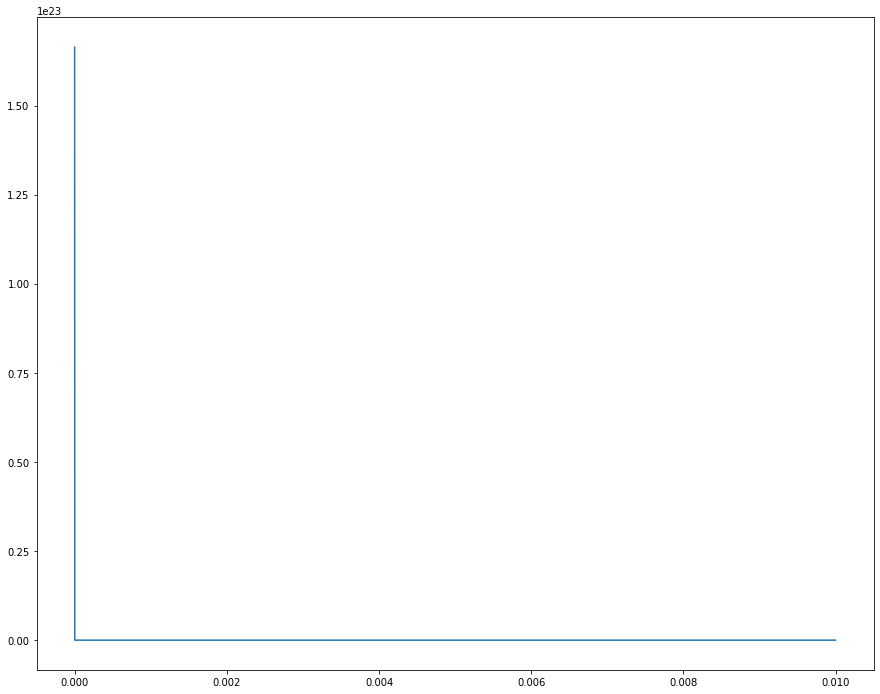

In [ ]:
plt.figure(figsize=(15,12))
plt.plot(alp,ride)
plt.show()

In [ ]:
ridges = dict(zip(ride,alp))
ridges[min(ridges.keys())]

1e-06

In [ ]:
# Before transform
modelr = Ridge(alpha=1e-06)
modelr.fit(filter_x_train, filter_y_train)
model_pred = modelr.predict(filter_x_test)
mse = MSE(filter_y_test,model_pred)
score = modelr.score(filter_x_test, filter_y_test)
score2 = modelr.score(filter_x_train, filter_y_train)
print(f'MSE: {mse} \nR2_score test: {score}\nR2_score train: {score2}')


MSE: 0.15293112682985163 
R2_score test: 0.5115681289067618
R2_score train: 0.5519838195543545


In [ ]:
# After Transform
modelr2 = Ridge(alpha=1e-06)
modelr2.fit(transformer_filter_x_train, transformer_filter_y_train)
model_pred2 = modelr2.predict(transformer_filter_x_test)
mse = MSE(transformer_filter_y_test, model_pred2)
score = modelr2.score(transformer_filter_x_test, transformer_filter_y_test)
score2 = modelr2.score(transformer_filter_x_train, transformer_filter_y_train)
print(f'MSE: {mse} \nR2_score test: {score}\nR2_score train: {score2}')


MSE: 0.4771615206594704 
R2_score test: 0.5181042926570165
R2_score train: 0.5574470642552387


In [ ]:
from sklearn.ensemble import RandomForestRegressor

fori = []

xw = np.arange(1,50,1)

for forest in xw:
    rfr = RandomForestRegressor(n_estimators=481, max_depth=forest)
    rfr.fit(filter_x_train, filter_y_train)
    filter_pred = rfr.predict(filter_x_test)
    fori.append(MSE(filter_y_test, filter_pred))


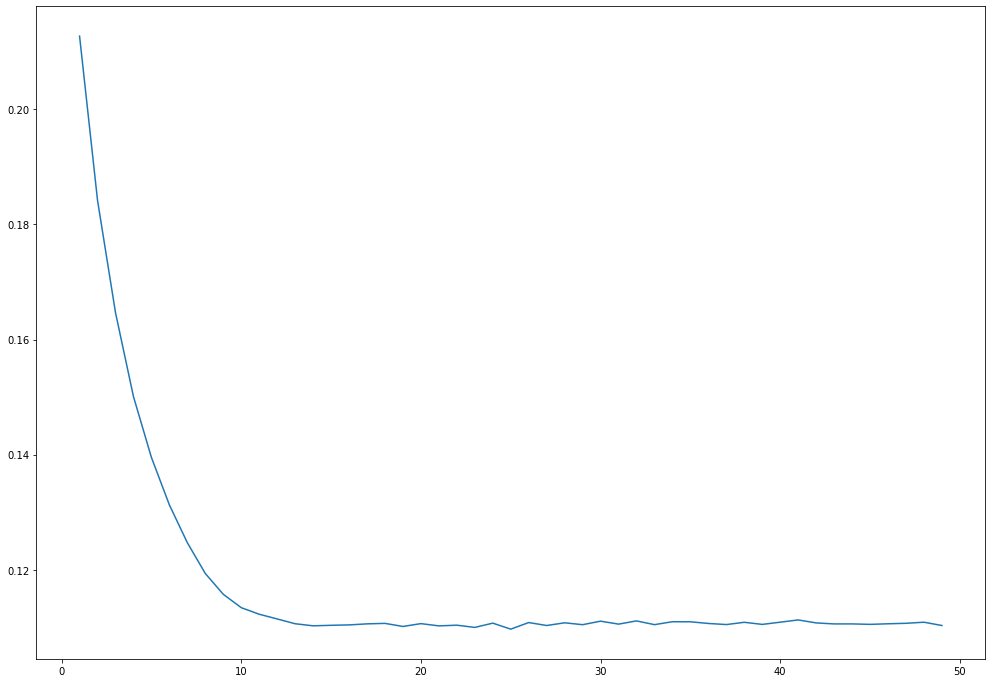

In [ ]:
plt.figure(figsize=(17,12))
plt.plot(xw, fori)
plt.show()

In [ ]:
rfrd = dict(zip(fori,xw))
rfrd[min(rfrd.keys())]


25

In [ ]:
rfr = RandomForestRegressor(n_estimators=481, max_depth=25)
rfr.fit(filter_x_train, filter_y_train)
filter_pred = rfr.predict(filter_x_test)
rf_mse = MSE(filter_y_test, filter_pred)
rf = rfr.score(filter_x_test, filter_y_test)
rf2 = rfr.score(filter_x_train, filter_y_train)
print(f'MSE: {rf_mse} \nR2_score test: {rf}\nR2_score train: {rf2}')


MSE: 0.11008471723227826 
R2_score test: 0.6484111146558542
R2_score train: 0.9465030606019825


In [ ]:
rfr = RandomForestRegressor(n_estimators=481, max_depth=25)
rfr.fit(transformer_filter_x_train, transformer_filter_y_train)
filter_pred = rfr.predict(transformer_filter_x_test)
rf_mse = MSE(transformer_filter_y_test, filter_pred)
rf = rfr.score(transformer_filter_x_test, transformer_filter_y_test)
rf2 = rfr.score(transformer_filter_x_train, transformer_filter_y_train)
print(f'MSE: {rf_mse} \nR2_score test: {rf}\nR2_score train: {rf2}')


MSE: 0.1812694879313965 
R2_score test: 0.6483829764950717
R2_score train: 0.9506939089538188


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

fori2 = []

xw = np.arange(1,50,1)

for grad in xw:
    gbr = GradientBoostingRegressor(n_estimators=300, max_depth=grad)
    gbr.fit(filter_x_train, filter_y_train)
    filter_pred = rfr.predict(filter_x_test)
    fori2.append(MSE(filter_y_test, filter_pred))



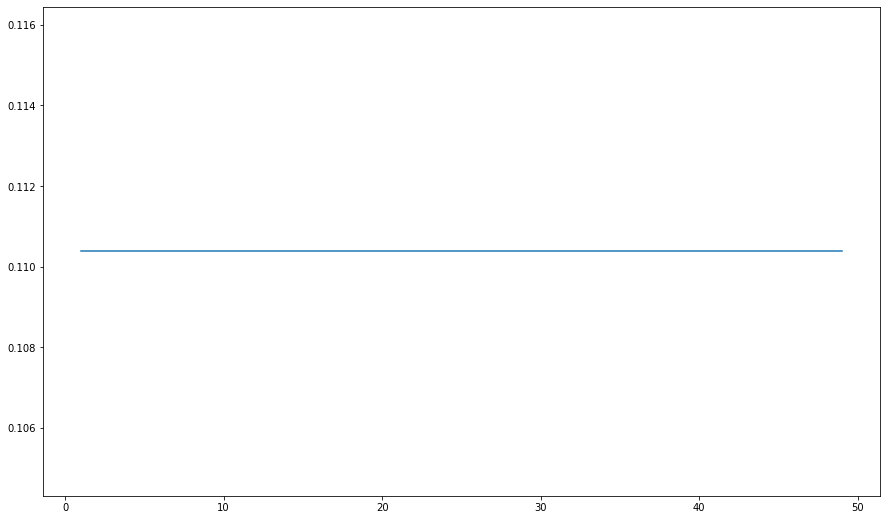

In [ ]:
plt.figure(figsize=(15,9))
plt.plot(xw,fori2)
plt.show()

In [ ]:
gbr = GradientBoostingRegressor(n_estimators=300)
gbr.fit(filter_x_train, filter_y_train)
filter_pred = rfr.predict(filter_x_test)
MSE(filter_y_test, filter_pred)

0.1107197435875829

In [ ]:
gbr.score(filter_x_test, filter_y_test)

0.6283402220318245

In [ ]:
gbr.score(filter_x_train, filter_y_train)

0.6980525735411018

In [ ]:
from sklearn.neighbors import KNeighborsRegressor


knr = KNeighborsRegressor(n_neighbors=5)
knr.fit(transformer_filter_x_train, transformer_filter_y_train)
print("KNN Score: ", knr.score(transformer_filter_x_train, transformer_filter_y_train))
print("KNN Test Score: ", knr.score(transformer_filter_x_test, transformer_filter_y_test))

KNN Score:  0.7457853839892259
KNN Test Score:  0.5738052383107756


In [ ]:
nib = np.arange(1,100,1)
neigh = []

for neighb in nib:
    knr = KNeighborsRegressor(n_neighbors=neighb)
    knr.fit(transformer_filter_x_train, transformer_filter_y_train)
    knr_pred = knr.predict(transformer_filter_x_test)
    neigh.append(MSE(transformer_filter_y_test, knr_pred))

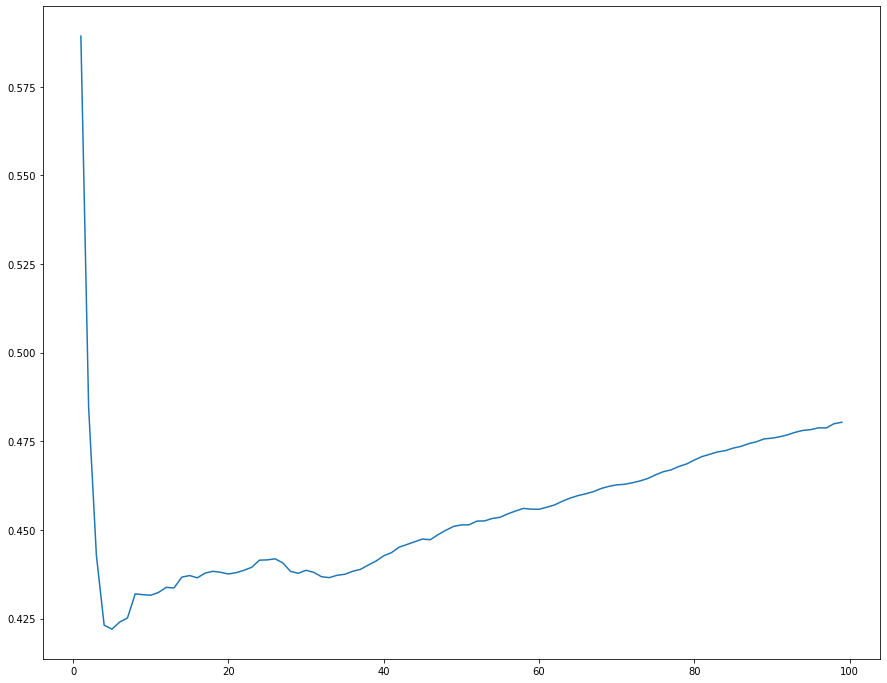

In [ ]:
plt.figure(figsize=(15,12))
plt.plot(nib,neigh)
plt.show()

In [ ]:
krn = dict(zip(neigh,nib))
krn[min(krn.keys())]


5

In [86]:
# # Instantiate a Sequential model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(20, input_shape=[33], activation='relu'),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(1)

])

# # Add a Dense layer with 50 neurons and an input of 1 neuron
# model.add(Dense(50, input_shape=(35,), activation='relu'))

# # Add two Dense layers with 50 neurons and relu activation
# model.add(Dense(50,activation='relu'))
# model.add(Dense(50,activation='relu'))


# # End your model with a Dense layer and no activation
# model.add(Dense(1))

In [94]:
filter_x_validate, filter_x_test, filter_y_validate, filter_y_test = train_test_split(filter_x_test, filter_y_test, test_size=0.5, random_state=42)

In [97]:
# # Compile your model
model.compile(optimizer = 'adam', loss = 'mse')

print("Training started..., this can take a while:")

# # Fit your model on your data epochs
model.fit(filter_x_train, filter_y_train, epochs = 5,
          validation_data=(filter_x_validate, filter_y_validate))

# # Evaluate your model 
print("Final loss value:",model.evaluate(filter_x_test, filter_y_test))

Training started..., this can take a while:
Epoch 1/5
182/182 [==============================] - 1s 2ms/step - loss: 0.1309 - val_loss: 0.1343
Epoch 2/5
182/182 [==============================] - 0s 1ms/step - loss: 0.1327 - val_loss: 0.1359
Epoch 3/5
182/182 [==============================] - 0s 1ms/step - loss: 0.1284 - val_loss: 0.1340
Epoch 4/5
182/182 [==============================] - 0s 1ms/step - loss: 0.1306 - val_loss: 0.1321
Epoch 5/5
23/23 [==============================] - 0s 1ms/step - loss: 0.1581
Final loss value: 0.1580582708120346


In [89]:
model.compile?

Signature:
model.compile(
    optimizer='rmsprop',
    loss=None,
    metrics=None,
    loss_weights=None,
    weighted_metrics=None,
    run_eagerly=None,
    steps_per_execution=None,
    jit_compile=None,
    **kwargs,
)
Docstring:
Configures the model for training.

Example:

```python
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy(),
                       tf.keras.metrics.FalseNegatives()])
```

Args:
    optimizer: String (name of optimizer) or optimizer instance. See
      `tf.keras.optimizers`.
    loss: Loss function. May be a string (name of loss function), or
      a `tf.keras.losses.Loss` instance. See `tf.keras.losses`. A loss
      function is any callable with the signature `loss = fn(y_true,
      y_pred)`, where `y_true` are the ground truth values, and
      `y_pred` are the model's predictions.
      `y_true` should have shape
      

In [ ]:
# filter = Sequential()

# filter.add(Dense(35, input_shape=[35,], activation='relu'))

# filter.add(Dense(1))

# filter.compile(optimizer='adam', loss='mse', metrics=['accuracy'])


# # Fit your model on your data for 30 epochs
# filter.fit(filter_x_train, filter_y_train, epochs = 20)

# # Evaluate your model 
# print("Final loss value:",model.evaluate(filter_x_test, filter_y_test))

In [ ]:
""" quiz materials for feature scaling clustering """

''''
Useful in Support Vector Machine and K Means Clustering Algorithms
'''

### FYI, the most straightforward implementation might 
### throw a divide-by-zero error, if the min and max
### values are the same
### but think about this for a second--that means that every
### data point has the same value for that feature!  
### why would you rescale it?  Or even use it at all?
import numpy
def featureScaling(arr):
    for scale in arr:
        (scale - min(arr))/(max(arr)- min(arr))
    arr2 = [(scale - min(arr))//(max(arr)- min(arr)) for scale in arr]
    
    return arr2

# tests of your feature scaler--line below is input data
data = [115, 140, 175]
print(featureScaling(data))



[0, 0, 1]


#### Feature Selection

1. Feature Scaling

#### Regularization

1. Lasso Regularization
2. Ridge Regularization
3. Kernel Regression
4. Robust Regression

#### Ensemble Methods
1. Decision Tree
2. Boosting Methods
3. Random Forest
4. Stacking Methods

##### Catboost Algorithm 

##### Hyperameter Tuning

1. GridSearchCV

In [ ]:
from xgboost import XGBRegressor
# xg = XGBRegressor(objective='reg:linear')
# xg.fit(filter_x_train, filter_y_train)
# preds = xg.predict(filter_x_test)

estimate = np.arange(0,20,1)
scores2 = []

for est in estimate:
    xg = XGBRegressor(learning_rate= 0.08700000000000034, n_estimators= 138, subsample= 0.8226999999999864)
    xg.fit(filter_x_train, filter_y_train)
    preds = xg.predict(filter_x_test)
    scores2.append(MSE(filter_y_test, preds))


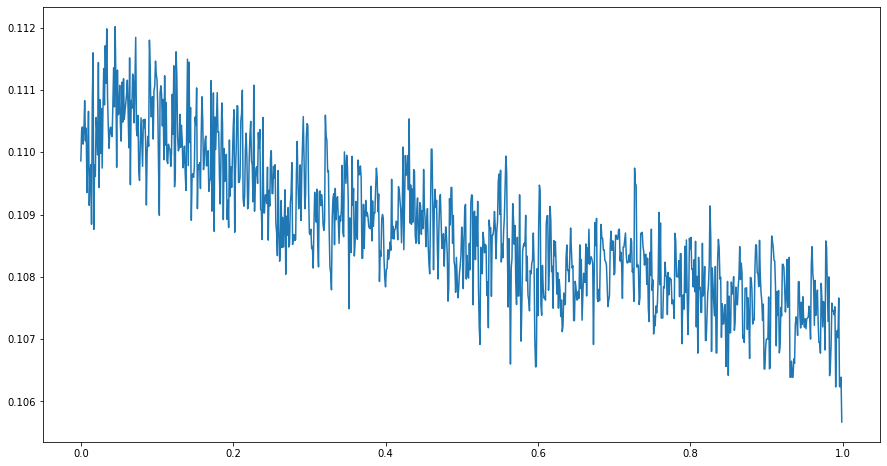

In [ ]:
# Ridge
plt.figure(figsize=(15,8))
plt.plot(estimate,scores2)
plt.show()

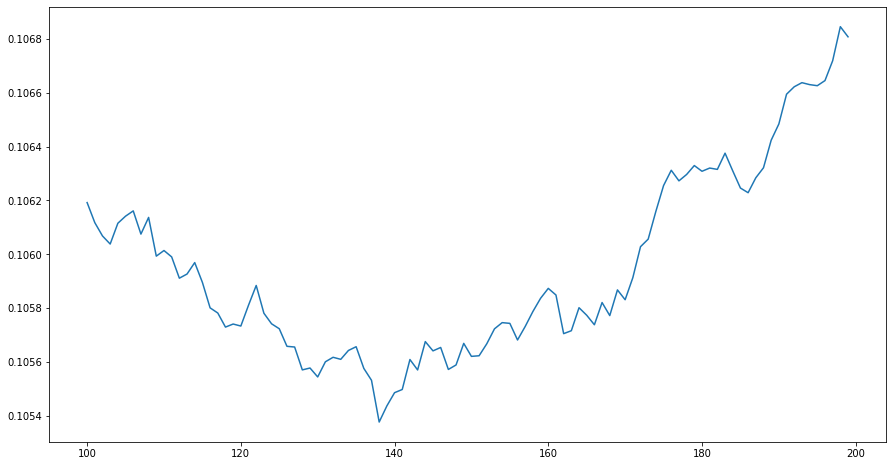

In [ ]:
# estimators
plt.figure(figsize=(15,8))
plt.plot(estimate,scores2)
plt.show()

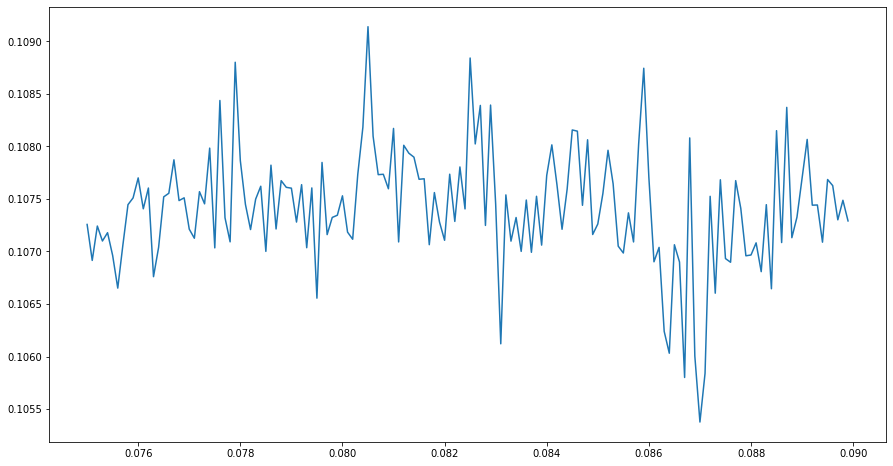

In [ ]:
# Learning rate
plt.figure(figsize=(15,8))
plt.plot(estimate,scores2)
plt.show()

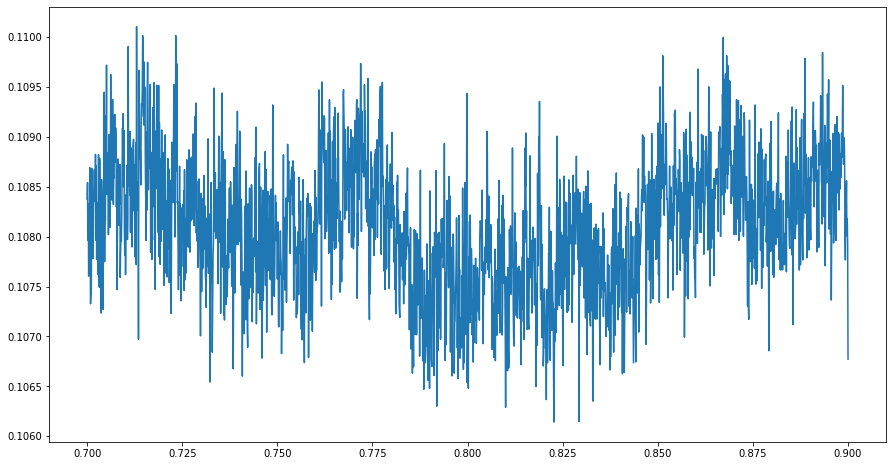

In [ ]:
# subsample
plt.figure(figsize=(15,8))
plt.plot(estimate,scores2)
plt.show()

In [ ]:
mint = dict(zip(scores2,estimate))
mint[min(mint.keys())]


19

In [ ]:
# from xgboost import XGBRegressor

xg = XGBRegressor(learning_rate= 0.08700000000000034, n_estimators= 138, subsample= 0.8226999999999864)
xg.fit(filter_x_train, filter_y_train)
preds = xg.predict(filter_x_test)

xg_mse = MSE(filter_y_test, preds)
xg_sc = xg.score(filter_x_test, filter_y_test)*100
xg_sc2 = xg.score(filter_x_train, filter_y_train)*100
print(f'MSE: {xg_mse} \nR2_score test: {xg_sc}\nR2_score train: {xg_sc2}')

MSE: 0.10566855414300483 
R2_score test: 66.25154689848887
R2_score train: 79.42099323885331


In [ ]:
# After Sacaling

xg = XGBRegressor(learning_rate= 0.08700000000000034, n_estimators= 168, subsample= 0.81)
xg.fit(transformer_filter_x_train, transformer_filter_y_train)
preds = xg.predict(transformer_filter_x_test)

xg_mse = MSE(transformer_filter_y_test, preds)
xg_sc = xg.score(transformer_filter_x_test, transformer_filter_y_test)*100
xg_sc2 = xg.score(transformer_filter_x_train, transformer_filter_y_train)*100
print(f'MSE: {xg_mse} \nR2_score test: {xg_sc}\nR2_score train: {xg_sc2}')

MSE: 0.17930426518260187 
R2_score test: 65.2195012273078
R2_score train: 81.49630181392094


In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'learning_rate': [0.092, 0.],
    'n_estimators': [120,130,140,150],
    'subsample': [0.89,0.9,0.91]
}


xg = XGBRegressor()
grids = GridSearchCV(estimator=xg, param_grid=parameters,
                    scoring='neg_mean_squared_error',
                    cv=5, verbose=1)
grids.fit(filter_x_train, filter_y_train)
# preds = xg.predict(filter_x_test)
grids.best_params_

Fitting 5 folds for each of 48 candidates, totalling 240 fits


{'learning_rate': 0.094, 'n_estimators': 140, 'subsample': 0.9}

In [ ]:
print(grids.best_params_)

{'learning_rate': 0.094, 'n_estimators': 140, 'subsample': 0.9}


In [ ]:
estimate = np.arange(100,200,1)
scores2 = []

for est in estimate:
    xg = XGBRegressor(learning_rate= 0.08700000000000034, n_estimators= est, subsample= 0.8226999999999864)
    xg.fit(transformer_filter_x_train, transformer_filter_y_train)
    preds = xg.predict(transformer_filter_x_test)
    scores2.append(MSE(transformer_filter_y_test, preds))

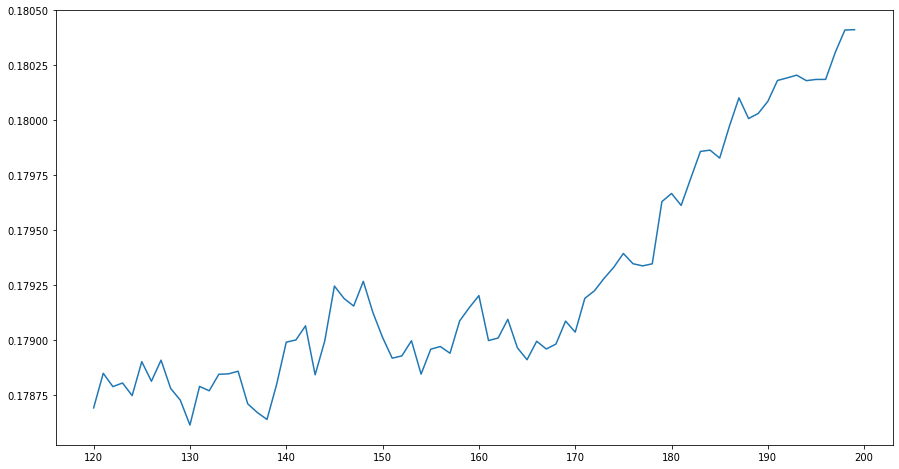

In [ ]:
# Ridge
plt.figure(figsize=(15,8))
plt.plot(estimate,scores2)
plt.show()

In [ ]:
mint = dict(zip(scores2,estimate))
mint[min(mint.keys())]


130